In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import f_classif
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
base_dir = "F:\Resources & Codes\Lab Dataset\Bangladeshi Crops Dataset\BangladeshiCrops\Crop___Disease\Rice"
image_size = 224
batch_size = 32

In [3]:
feature_extraction_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [4]:
all_images = []
all_labels = []

for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
            img_array = keras.preprocessing.image.img_to_array(img)
            all_images.append(img_array)
            all_labels.append(class_folder)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(all_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    all_images, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [7]:
X_train = np.reshape(X_train, (-1, image_size, image_size, 3))

In [8]:
train_data = feature_extraction_datagen.flow(
    X_train, keras.utils.to_categorical(y_train), batch_size=batch_size, shuffle=False
)

In [9]:
X_test = np.reshape(X_test, (-1, image_size, image_size, 3))

In [10]:
test_data = feature_extraction_datagen.flow(
    X_test, keras.utils.to_categorical(y_test), batch_size=batch_size, shuffle=False
)

In [11]:
print(X_train)
print(X_test)

[[[[190. 195. 214.]
   [196. 201. 220.]
   [194. 199. 218.]
   ...
   [137. 116.  97.]
   [ 94.  71.  55.]
   [173. 155. 135.]]

  [[194. 201. 219.]
   [195. 200. 219.]
   [198. 203. 222.]
   ...
   [100.  77.  61.]
   [112.  91.  74.]
   [166. 145. 118.]]

  [[195. 198. 217.]
   [191. 196. 215.]
   [195. 197. 218.]
   ...
   [ 88.  65.  49.]
   [109.  87.  63.]
   [121. 100.  73.]]

  ...

  [[183. 188. 208.]
   [180. 185. 205.]
   [182. 187. 207.]
   ...
   [169. 174. 193.]
   [170. 177. 196.]
   [171. 176. 196.]]

  [[181. 186. 206.]
   [179. 184. 204.]
   [181. 188. 207.]
   ...
   [170. 177. 196.]
   [171. 178. 196.]
   [173. 178. 198.]]

  [[182. 189. 208.]
   [181. 186. 206.]
   [183. 188. 210.]
   ...
   [164. 169. 189.]
   [166. 173. 192.]
   [169. 174. 194.]]]


 [[[206. 205. 203.]
   [206. 205. 203.]
   [206. 205. 203.]
   ...
   [210. 207. 202.]
   [210. 207. 202.]
   [210. 207. 202.]]

  [[206. 205. 203.]
   [206. 205. 203.]
   [206. 205. 203.]
   ...
   [209. 206. 201.]
 

In [12]:
print(y_train)
print(y_test)

[3 2 1 ... 2 0 2]
[1 3 3 3 2 2 1 2 3 0 2 3 1 1 3 1 1 3 1 1 1 1 3 3 2 3 1 0 1 0 3 0 2 1 0 3 3
 3 3 2 3 1 2 1 1 1 1 0 0 3 1 1 0 2 3 2 2 3 2 0 1 2 1 3 0 1 1 1 2 2 2 1 3 2
 2 3 0 0 2 2 1 2 1 1 2 1 1 3 1 2 1 2 0 1 1 3 3 1 1 1 3 1 2 1 0 1 2 1 3 1 3
 2 2 1 1 3 1 1 0 2 2 2 2 1 1 3 0 3 3 1 0 3 2 3 3 3 3 3 1 0 3 2 2 3 1 3 1 3
 1 1 3 3 3 2 1 1 2 1 3 3 0 0 3 1 1 1 2 3 2 1 3 2 1 0 3 3 2 0 1 2 1 3 2 1 3
 1 0 3 3 1 1 1 2 3 1 1 2 3 2 1 3 1 3 1 3 3 1 1 2 2 1 1 0 3 1 2 1 1 3 3 2 2
 2 3 2 1 1 1 0 3 0 1 3 2 2 0 2 2 3 1 0 3 3 2 1 0 0 0 0 1 2 3 3 0 1 0 3 1 1
 1 0 1 1 2 2 2 1 3 2 3 3 2 0 3 0 1 2 1 1 2 1 1 0 2 0 3 0 2 1 2 1 0 2 2 1 1
 3 0 1 0 3 1 3 3 2 1 2 2 2 1 0 0 2 2 3 2 1 1 3 1 1 3 2 3 3 3 3 1 1 1 1 2 3
 1 2 2 0 2 3 2 3 3 3 3 1 3 1 0 3 1 3 3 2 0 2 2 3 1 0 1 0 2 1 1 1 3 2 1 1 3
 2 1 3 1 2 3 1 0 2 1 3 1 3 3 1 2 2 2 2 2 3 1 1 2 3 1 1 0 0 1 3 2 1 1 1 3 3
 1 3 2 0 2 3 0 0 1 2 1 1 3 3 3 0 1 3 1 0 1 2 0 1 1 3 3 3 1 0 3 0 1 0 1 2 2
 0 0 1 2 0 2 1 2 2 0 0 3 0 2 0 1 1 0 3 1 1 1 0 3 3 3 0 1 1 1 2 1 2 2 2 3 1
 0 3 3 

In [13]:
# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data):
    base_model = model(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_test_features.append(extract_features(model, X_test))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_test_features_std = scaler.fit_transform(X_test_features)


1/1 [==============================] - 0s 63ms/step


In [14]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')
X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)  # Use transform instead of fit_transform

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)

d:\Python\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   3    4   23   26   33   44   60   62   65   66   68   73   74   83
   85   87  102  104  115  119  124  125  137  138  147  150  151  157
  164  171  174  190  199  220  222  243  244  250  254  261  264  272
  274  300  312  315  326  328  336  352  353  357  360  371  387  389
  391  399  401  402  409  415  418  421  423  430  438  439  441  447
  454  464  468  469  472  473  476  485  510  513  514  516  517  518
  523  528  552  558  561  562  569  575  583  591  599  602  608  609
  615  616  622  623  628  633  637  646  649  655  656  659  663  672
  674  682  703  708  717  721  728  734  753  754  755  759  775  776
  781  783  787  789  791  793  794  796  798  813  828  829  838  866
  869  876  878  886  893  920  921  924  935  936  938  946  949  951
  956  964  965  967  968  970  987  993  998  999 1003 1005 1011 1023
 1026 1029 1031 1048 1049 1056 1062 1082 1

Selected Features Indices: [   0    1    2 ... 5373 5374 5375]



Support Vector Machine (SVM)

In [15]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train)

# Predict on test set
svm_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Classifier Accuracy:", svm_accuracy * 100)

SVM Classifier Accuracy: 84.43627450980392


Precision, Recall, and F1 score for SVM

In [16]:
svm_predictions = svm_classifier.predict(X_test_selected)

svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Precision: 0.8444646411817347
SVM Recall: 0.8443627450980392
SVM F1 Score: 0.8439922597474273


Logistic Regression

In [17]:
logreg = LogisticRegression(random_state=42,max_iter=1000)

history = logreg.fit(X_train_selected, y_train)

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.joblib')

# Predict on the test set using the loaded model
predictions = loaded_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Test Accuracy:", accuracy * 100)

Logistic Regression Test Accuracy: 85.5392156862745


Precision, Recall, and F1 score for Logistic Regression

In [18]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8533428195397219
Recall: 0.8553921568627451
F1 Score: 0.8539371455382778


DNN

In [19]:
# One-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

# Define the DNN model
def build_dnn_model(input_dim, num_of_classes):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_of_classes, activation='softmax')  # Use 'softmax' for multi-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Check the number of features after ANOVA feature selection
num_selected_features = len(selected_features_indices)

# Build the DNN model
dnn_model = build_dnn_model(num_selected_features, 4)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the DNN model with one-hot encoded labels
history = dnn_model.fit(X_train_selected, y_train_one_hot,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test_selected, y_test_one_hot), callbacks=[checkpoint])

Epoch 1/100
101/102 [============================>.] - ETA: 0s - loss: 0.9985 - accuracy: 0.6847
Epoch 1: val_accuracy improved from -inf to 0.80392, saving model to model_checkpoint.h5
102/102 [==============================] - 3s 16ms/step - loss: 0.9961 - accuracy: 0.6845 - val_loss: 0.5166 - val_accuracy: 0.8039
Epoch 2/100
101/102 [============================>.] - ETA: 0s - loss: 0.6282 - accuracy: 0.7726
Epoch 2: val_accuracy improved from 0.80392 to 0.81863, saving model to model_checkpoint.h5
102/102 [==============================] - 1s 9ms/step - loss: 0.6280 - accuracy: 0.7722 - val_loss: 0.4641 - val_accuracy: 0.8186
Epoch 3/100
 94/102 [==========================>...] - ETA: 0s - loss: 0.5935 - accuracy: 0.8009
Epoch 3: val_accuracy did not improve from 0.81863
102/102 [==============================] - 1s 7ms/step - loss: 0.5936 - accuracy: 0.8020 - val_loss: 0.4621 - val_accuracy: 0.8150
Epoch 4/100
102/102 [==============================] - ETA: 0s - loss: 0.4445 - acc

Precision, Recall, and F1 score for DNN

In [20]:
# Predict on the test set using the DNN model
dnn_predictions = dnn_model.predict(X_test_selected)
dnn_predictions = np.argmax(dnn_predictions, axis=1)  # Convert one-hot encoded predictions to class labels

dnn_precision = precision_score(y_test, dnn_predictions, average='weighted')
dnn_recall = recall_score(y_test, dnn_predictions, average='weighted')
dnn_f1 = f1_score(y_test, dnn_predictions, average='weighted')

print("DNN Precision:", dnn_precision)
print("DNN Recall:", dnn_recall)
print("DNN F1 Score:", dnn_f1)


26/26 [==============================] - 0s 4ms/step
DNN Precision: 0.8668428756873805
DNN Recall: 0.8688725490196079
DNN F1 Score: 0.8669233686044759


Plot training and validation accuracy

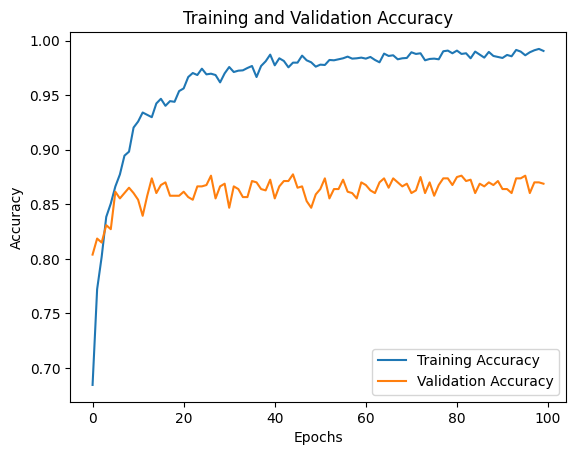

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot training and validation loss

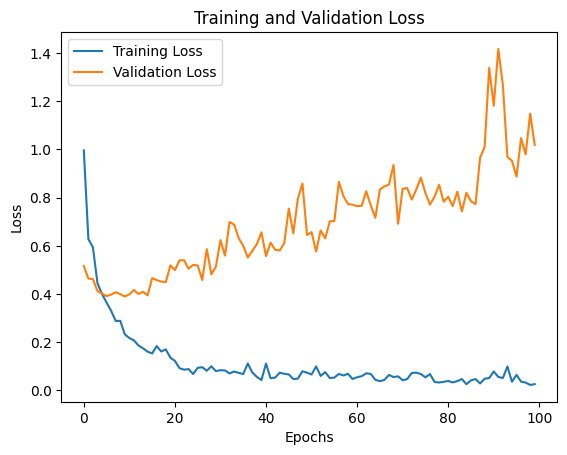

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()